In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics as st 

In [127]:
df = pd.read_csv('melb_data.csv')
df.head()
df.to_csv('properties.csv')

In [18]:
# df.info()

In [40]:
# Mengecek apakah ada NaN value dalam dataframe
df.isna().sum()
# Car = 62
# BuildingArea = 6450
# YearBuilt    = 5375
# CouncilArea  = 1369 

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [117]:
### Mengganti semua angka 0 dengan NaN value agar perhitungan mean, median, modus tidak terpengaruh angka 0 yang banyak muncul
df_na = df.replace(0, np.nan)
df1 = df_na.dropna()

In [54]:
## MEMASTIKAN APAKAH MASIH ADA NAN VALUE DALAM DF
df1.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

## 1. Untuk feature/column 'LANDSIZE & PRICE', hitung dan beri penjelasan (insight) terkait:  
* Titik Pusat Data (Central Tendency)
* Persebaran Data (Dispersion)
* Distribusi Data (Distribution)

### A. Central Tendencies

In [56]:
# MEAN/AVERAGE
## mencari nilai pusat data dengan rata-rata data. 
## Fungsi ini dipakai jika tidak ada outliers / data yg beda sendiri
print('Rata-rata Luas Tanah/Landsize (ada zero values): ',df['Landsize'].mean())
print('Rata-rata Harga Properti     (ada zero values) : ',df['Price'].mean())
print('Rata-rata Luas Tanah/Landsize                  : ',df1['Landsize'].mean())
print('Rata-rata Harga Properti                       : ',df1['Price'].mean())
## terdapat perbedaan nilai mean ketika masih ada zero values dalam data
## Nilai rata-rata adalah --> Landsize = 583 ; Price = 1.154.769 Dollar Aussie
## diambil nilai tanpa zero values karena keberadaan nilai zero membuat gambaran analisa menjadi kurang optimal/masuk akal.

Rata-rata Luas Tanah/Landsize (ada zero values):  651.4295163645735
Rata-rata Harga Properti     (ada zero values) :  1075684.079455081
Rata-rata Luas Tanah/Landsize                  :  583.1511046269279
Rata-rata Harga Properti                       :  1154768.9299708211


In [57]:
# MEDIAN
## dipakai jika ada outliers / distribusi data tidak normal, ada nilai ekstrim dalam data
## nilai tengah, "index ke (n+1)/2" kalo ada 9 jumlah data --> maka median = data ke 5
## kalo ada 100 data, maka --> median = rata2 data 50 dan 51
print('Median Luas Tanah/Landsize (ada zero values): ',df['Landsize'].mean())
print('Median Harga Properti     (ada zero values) : ',df['Price'].mean())
print('Median Luas Tanah/Landsize                  : ',df1['Landsize'].median())
print('Median Harga Properti                       : ',df1['Price'].median())
# Juga terdapat perbedaan nilai median ketika masih ada zero values dalam data
## Nilai tengah data adalah --> Landsize = 521 ; Price = 950.000 Dollar Aussie

Median Luas Tanah/Landsize (ada zero values):  651.4295163645735
Median Harga Properti     (ada zero values) :  1075684.079455081
Median Luas Tanah/Landsize                  :  521.0
Median Harga Properti                       :  950000.0


In [59]:
# MODE
## nilai/value yang paling sering muncul dalam kumpulan data
print('Modus Luas Tanah/Landsize (ada zero values): ',df['Landsize'].mode())
print('Modus Harga Properti     (ada zero values) : ',df['Price'].mode())
print('Modus Luas Tanah/Landsize                  : ',df1['Landsize'].mode())
print('Modus Harga Properti                       : ',df1['Price'].mode())
## modus landsize bernilai sama sedangkan modus price memiliki perbedaan signifikan ketika masih ada zero values.
## Nilai yang paling sering muncul adalah --> Landsize = 650 ; Price = 600.000 Dollar Aussie

Modus Luas Tanah/Landsize (ada zero values):  0    650.0
dtype: float64
Modus Harga Properti     (ada zero values) :  0    1100000.0
dtype: float64
Modus Luas Tanah/Landsize                  :  0    650.0
dtype: float64
Modus Harga Properti                       :  0    600000.0
dtype: float64


### B. Spread/Dispersion

In [62]:
# 1. VARIANCE
## - Digunakan mengukur seberapa jauh jarak setiap angka dalam data dari pusat data. ketika ada sample data yg berada jauh       dari populasi
## - Semakin spread data kita, semakin tinggi nilai Variance (data dengan variasi tinggi)
## - kuadrat dri jarak dari titik data ke rata-rata 1 dataframe
print('Variance Luas Tanah/Landsize (ada zero values): ',df['Landsize'].var())
print('Variance Harga Properti     (ada zero values) : ',df['Price'].var())
print('Variance Luas Tanah/Landsize                  : ',df1['Landsize'].var())
print('Variance Harga Properti                       : ',df1['Price'].var())
## Nilai variance data adalah --> Landsize = 968.910 ; Price = 494.067.954.483 

Variance Luas Tanah/Landsize (ada zero values):  18517716.119279914
Variance Harga Properti     (ada zero values) :  408718202199.89923
Variance Luas Tanah/Landsize                  :  968910.0861891068
Variance Harga Properti                       :  494067954483.68146


In [63]:
## Perbedaan antara 'variance()' and 'pvariance()': ketika menggunakan variance(), hanya rata2 sample yang dipakai. Namun pvariance(), rata-rata seluruh populasi juga diperhitungkan.

print('Variance Populasi Luas Tanah/Landsize (ada zero values): ',st.pvariance(df['Landsize']))
print('Variance Populasi Harga Properti     (ada zero values) : ',st.pvariance(df['Price']))
print('Variance Populasi Luas Tanah/Landsize                  : ',st.pvariance(df1['Landsize']))
print('Variance Populasi Harga Properti                       : ',st.pvariance(df1['Price']))

### terdapat sedikit perbedaan antara kedua nilai variance, namun secara garis besar nilai variance luas tanah berada di angka 968 ribu & variance harga properti adalah 494 miliar

Variance Populasi Luas Tanah/Landsize (ada zero values):  nan
Variance Populasi Harga Properti     (ada zero values) :  408688105130.51776
Variance Populasi Luas Tanah/Landsize                  :  968708.1457793133
Variance Populasi Harga Properti                       :  493964980754.1101


In [64]:
# 2. STANDAR DEVIASI
print('Nilai standar deviasi Luas Tanah/Landsize (ada zero values): ',df['Landsize'].std())
print('Nilai standar deviasi Harga Properti     (ada zero values) : ',df['Landsize'].std())
print('Nilai standar deviasi Luas Tanah/Landsize                  : ',df1['Landsize'].std())
print('Nilai standar deviasi Harga Properti                       : ',df1['Price'].std())
## digunakan utk mengukur variabilitas. 
## Nilai standar deviasi data adalah --> Landsize = 984,33 ; Price = 702.899,68 

Nilai standar deviasi Luas Tanah/Landsize (ada zero values):  4303.221597742779
Nilai standar deviasi Harga Properti     (ada zero values) :  4303.221597742779
Nilai standar deviasi Luas Tanah/Landsize:  984.3323047574467
Nilai standar deviasi Harga Properti     :  702899.6759735214


### C. Distribution

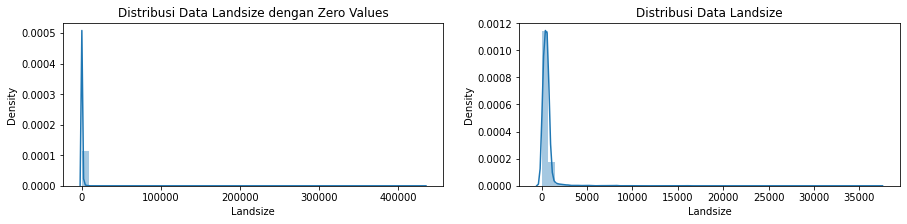

In [67]:
## Distribusi --> probability Distribusi: probabilitas kemunculan nilai yang berbeda
## CEK NORMAL DISTRIBUTION
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.distplot(df['Landsize'])
plt.title('Distribusi Data Landsize dengan Zero Values')
plt.subplot(122)
sns.distplot(df1['Landsize'])
plt.title('Distribusi Data Landsize')
plt.show()
## outliers berada di rentang 0-1000.

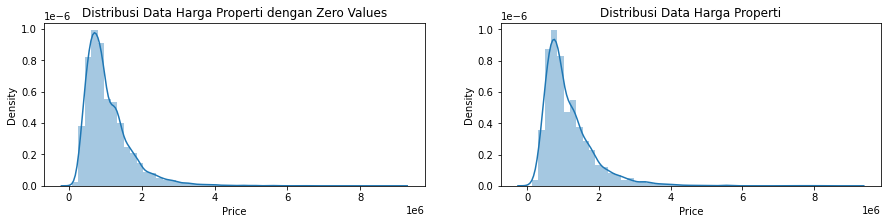

In [68]:
# DISTRIBUSI DATA PRICE
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.distplot(df['Price'])
plt.title('Distribusi Data Harga Properti dengan Zero Values')
plt.subplot(122)
sns.distplot(df1['Price'])
plt.title('Distribusi Data Harga Properti')
plt.show()
## Distribusi tidak normal
## outliers berada di rentang 0-2.

In [123]:
# sns.distplot(df1['Landsize'])
# plt.title('Distribusi Data Luas Tanah')
# plt.savefig('landsize.png')
# plt.show()

In [124]:
# sns.distplot(df1['Price'])
# plt.title('Distribusi Data Harga Properti')
# plt.savefig('price.png')
# plt.show()

In [71]:
stats.skewtest(df1['Landsize'])  #distribusi tidak normal, H-null ditolak; (p-value < alpha)

SkewtestResult(statistic=87.83295774689684, pvalue=0.0)

In [72]:
stats.skewtest(df1['Price'])  #distribusi tidak normal, H-null ditolak; (p-value < alpha)

SkewtestResult(statistic=42.100451441707406, pvalue=0.0)

In [73]:
###  ADA 2 CARA UNTUK CEK DISTRIBUSI DATA: SKEWNESS & KURTOSIS
from scipy.stats import kurtosis, skew

print( 'kurtosis dari normal distribution Landsize              : {}'.format( kurtosis(df1['Landsize'])))
print( 'skewness dari normal distribution Landsize              : {}'.format( skew(df1['Landsize'])))
# kurtosis dari data landsize > 3 (Leptokurtic). Outliers mengarah dan tajam keatas.
# skewness dari data landsize = 18 --> highly-skewed/sangat tidak simetris yaitu positive skew

print( 'kurtosis dari normal distribution Harga Properti        : {}'.format( kurtosis(df1['Price'])))
print( 'skewness dari normal distribution Harga Properti        : {}'.format( skew(df1['Price'])))
# kurtosis dari data harga > 3 (Leptokurtic). Outliers mengarah dan tajam keatas.
# skewness dari data harga = 2.45 --> highly-skewed/sangat tidak simetris yaitu positive skew

kurtosis dari normal distribution Landsize              : 502.1370892823442
skewness dari normal distribution Landsize              : 18.087584432658844
kurtosis dari normal distribution Harga Properti        : 11.8296848230308
skewness dari normal distribution Harga Properti        : 2.4496581939292925


## 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

In [78]:
def outlier(data):
    x = []
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')  
    Q2 = np.percentile(data, 50, interpolation = 'midpoint')  
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1  
    fence_low = Q1 - (1.5*IQR)
    fence_high = Q3 + (1.5*IQR) 

    # print(f'Batas Bawah: {fence_low}')
    # print(f'Batas Atas: {fence_high}')

    for outliers in data:
        if outliers < fence_low or outliers > fence_high:
            x.append(outliers)
    return x
print('Jumlah outliers dalam data Distance : {}'.format(len(outlier(df1['Distance']))))

Jumlah outliers dalam data Distance : 195


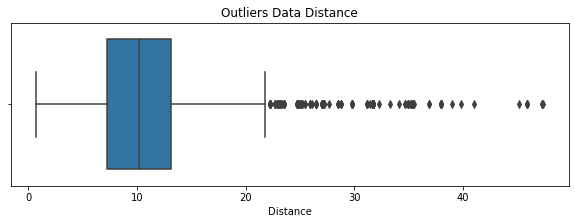

In [121]:
plt.figure(figsize=(10,3))
sns.boxplot(x='Distance',data=df1)
plt.title('Outliers Data Distance')
plt.savefig('dist_out.png')
plt.show()

In [118]:
## INSIGHT
# Pada data distance, terdapat 195 jumlah outliers pada data sehingg memnyebabkan distribusi menjadi tidak normal karena cukup terpenagruhi oleh ekstrim value dalam data.

### 4. Tampilkan perkembangan rata-rata harga (Price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

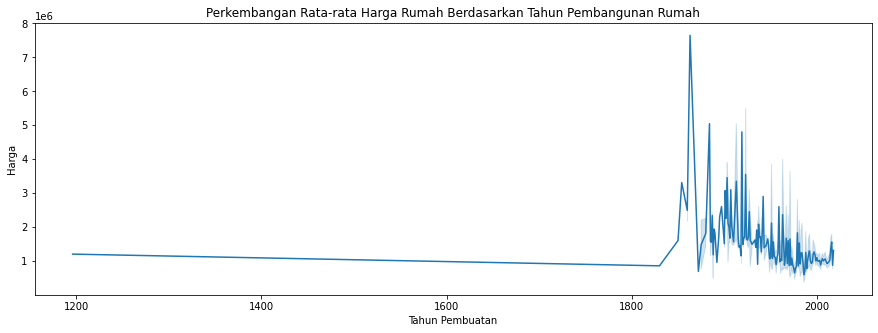

In [122]:
plt.figure(figsize=(15,5))
sns.lineplot(x='YearBuilt', y='Price', data=df1) #--> perkembangan rata2 harga  ## NON-KATEGORIKAL
plt.xlabel('Tahun Pembuatan')
plt.ylabel('Harga')
plt.title('Perkembangan Rata-rata Harga Rumah Berdasarkan Tahun Pembangunan Rumah')
plt.savefig('yearbuilt.png')
plt.show()

In [115]:
## INSIGHT
## Berdasarkan gambar diatas, dapat dianalisa bahwa terjadi fluktuasi harga properti yang dibangun diatas tahun 1800an dengan peak-down harga yang cukup dinamis dan tajam diatas tahun pembuatan 1900-an serta Harga jual paling tinggi adalah properti dengan tahun pembuatan di sekitar 1850-an.
## Secara garis besar, harga proeprti mengalami penurunan untuk properti dengan tahun pembuatan 1200-1800 sedangkan baru mengalami kenaikan kenaikan ekstrim diatas tahun 1800-an. Hal ini mungkin dipengaruhi oleh banyak hal, salah satunya kualitas dan modernisasi bangunan tahun 1800-an yang masih cocok namun elegan sehingga memiliki harga jual yang melonjak tinggi.

### 5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

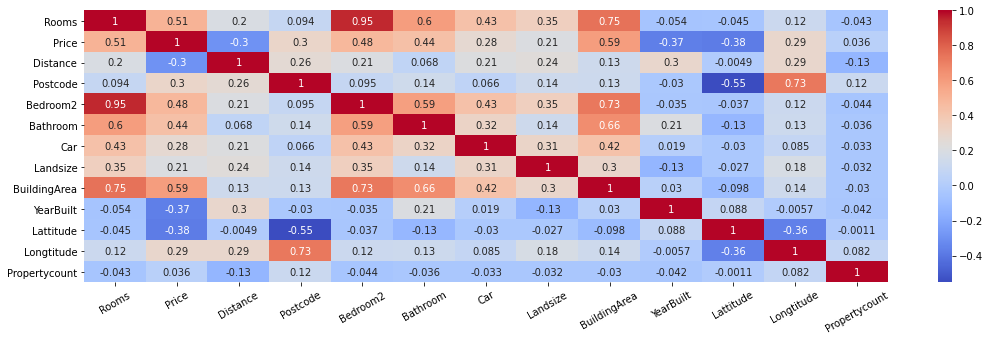

In [125]:
plt.figure(figsize=(18,5))
sns.heatmap(df1.corr(method='spearman'),cmap='coolwarm',annot=True)
plt.xticks(rotation=30)
plt.savefig('corr.png')
plt.show()

In [114]:
#### INSIGHT
# - Berdasarkan gambar diatas, feature/kolom 'Rooms' memiliki nilai korelasi paling tinggi dibandingkan kolom distance dan landsize
# sehingga jika dapat menyarankan, harga properti sangat dipengaruhi oleh kualitas dan fasilitas ruangan terlepas dari jarak lokasi properti (weak correlated) dan luas tanah tempat properti (small correlation). Untuk mendapatkan keuntungan yang optimal, dapat difokuskan pada peningkatan fasilitas ruangan sedangkan bagi konsumen dapat mencari fasilitas yang cocok sesuai dengan jarak dan luas tanah yang terbaik dengan harga yang diinginkan.
# - Dari korelasi heatmap diatas menggunakan metode spearman karena data tidak terdistribusi secara normal. Sehingga untuk melihat korelasi ini, dperlukan analisas dan interpretasi secara kualitas terlepas dari rentang korelasi yang diberikan.

### 6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, CARI:
- Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!
- Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!
- Metode penjualan properti (Method) yang paling sering dilakukan!

In [108]:
df1.groupby('Regionname').mean('Price').sort_values('Price', ascending=False)['Price']
## mengelompokkan berdasarkan Region name, lalu mencari nilai rata2 harga dan mengurutkan dari harga yang terbesar (ascending=False)
# kolom ['Price'] diakhir untuk memanggil kolom harga saja 

Regionname
Southern Metropolitan         1.608573e+06
Eastern Metropolitan          1.124214e+06
South-Eastern Metropolitan    9.443952e+05
Western Metropolitan          9.073670e+05
Northern Metropolitan         9.056244e+05
Eastern Victoria              6.810944e+05
Northern Victoria             5.655882e+05
Western Victoria              3.910714e+05
Name: Price, dtype: float64

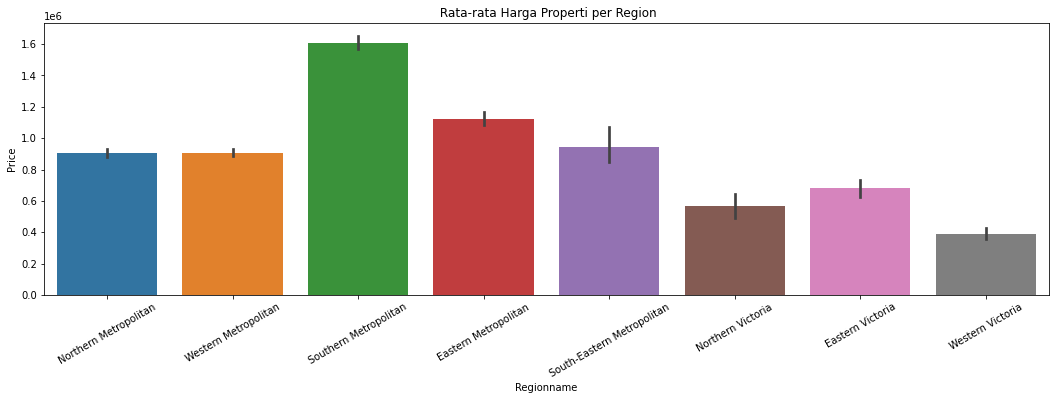

In [126]:
plt.figure(figsize=(18,5))
sns.barplot(x='Regionname', y='Price', data=df1) #--> rata2 harga
plt.title(' Rata-rata Harga Properti per Region')
plt.xticks(rotation=30)
plt.savefig('regprice.png')
plt.show()

In [116]:
## INSIGHT
## dapat dilihat bahwa harga properti di daerah metroplitan jauh lebih tinggi dibandingkan hara properti di daerah Victoria.
## dapat dilihat bahwa harga properti di metroplitan selatan memiliki rata-rata harga jual yang paling tinggi.
## Sedangkan harga properti di Victoria bagian barat memiliki rata-rata harga jual paling rendah sehingga jika ingin membeli properti dengan harga yang relatif murah, dapat mencari properti di sekitar daerah victoria barat.

### 7. Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan harga properti antar Region Name! (Anggap Price memiliki distribusi normal)